TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.

There are several differences between these two frameworks. Keras is a neural network library while TensorFlow is the open-source library for a number of various tasks in machine learning. TensorFlow provides both high-level and low-level APIs while Keras provides only high-level APIs. In terms of flexibility, Tensorflow’s eager execution allows for immediate iteration along with intuitive debugging. Keras offers simple and consistent high-level APIs and follows best practices to reduce the cognitive load for the users. Both frameworks thus provide high-level APIs for building and training models with ease. Keras is built in Python which makes it way more user-friendly than TensorFlow. (https://analyticsindiamag.com/tensorflow-vs-keras-which-one-should-you-choose/)

In [4]:
import tensorflow as tf

matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In [7]:
import matplotlib.pyplot as plt

Module: tf.keras.datasets:

boston_housing module: Boston housing price regression dataset.

cifar10 module: CIFAR10 small images classification dataset.

cifar100 module: CIFAR100 small images classification dataset.

fashion_mnist module: Fashion-MNIST dataset.

imdb module: IMDB sentiment classification dataset.

mnist module: MNIST handwritten digits dataset.

reuters module: Reuters topic classification dataset.

In [8]:
mnist = tf.keras.datasets.mnist # dataset of handwritten digits from 0 to 9

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(); # loading data from the dataset

# normalizing the data (makes easier for a network to learn)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

11493376/11490434 [==============================] - 0s 0us/step


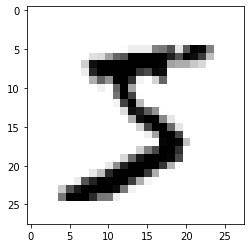

In [14]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
# print(x_train[0])

# it's a black and white image (binary image)

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

A Sequential model is not appropriate when:

Your model has multiple inputs or multiple outputs
Any of your layers has multiple inputs or multiple outputs
You need to do layer sharing
You want non-linear topology (e.g. a residual connection, a multi-branch model)

There are three ways to create Keras models:

*   The Sequential model, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers (as the name gives away).
*   The Functional API, which is an easy-to-use, fully-featured API that supports arbitrary model architectures. For most people and most use cases, this is what you should be using. This is the Keras "industry strength" model.

*   Model subclassing, where you implement everything from scratch on your own. Use this if you have complex, out-of-the-box research use cases.



In [16]:
# building the model to traning the neural network.
model = tf.keras.models.Sequential()
# the first layer is the input layer
# the array is 28 by 28 bidimensional array, we must flat that
model.add(tf.keras.layers.Flatten()) # input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 128 neurons and relu activation function (hidden layer)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 128 neurons and relu activation function (hidden layer)
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # 128 neurons and relu activation function (output layer)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6260 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3626 - accuracy: 0.9268
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2344 - accuracy: 0.9449
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1744 - accuracy: 0.9543
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1434 - accuracy: 0.9610


The idea is that the model generalize and not overfitting, so calculate val_loss and val_acc

In [17]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1452 - accuracy: 0.9630
0.14515450596809387 0.9629999995231628


Para salvar e carregar o modelo, usar os seguintes comandos:



In [19]:
model.save('model_saved')
modelnew = tf.keras.models.load_model('model_saved')

INFO:tensorflow:Assets written to: model_saved/assets


In [21]:
predictions = modelnew.predict([x_test]);
print(predictions)

[[1.5621051e-17 8.1483896e-11 3.6872880e-08 ... 9.9999797e-01
  8.6742134e-11 3.0117238e-07]
 [2.6958100e-09 1.4477729e-14 9.9996972e-01 ... 3.0190089e-05
  9.0494066e-09 7.7282922e-15]
 [2.6457164e-08 9.9998069e-01 2.6077853e-08 ... 3.1609940e-07
  1.8155872e-05 7.1655586e-07]
 ...
 [3.4160653e-11 5.4298326e-11 2.0582293e-11 ... 7.8140062e-08
  2.0232453e-11 1.5370132e-06]
 [4.0586485e-27 7.9159575e-33 3.5772144e-33 ... 5.1752530e-27
  1.0393883e-21 2.9234815e-26]
 [1.0238548e-23 1.4138740e-21 1.6903911e-22 ... 8.8612302e-32
  1.7364753e-22 0.0000000e+00]]


7


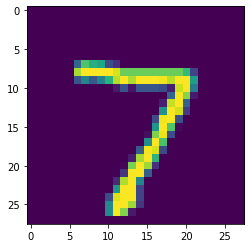

In [23]:
import numpy as np
print(np.argmax(predictions[0]))

plt.imshow(x_test[0])
plt.show()